<p align="center">
  <strong>Machine Vision Lab Assignment 1B</strong><br>
  <strong> BCSE417P </strong><br>
  Joel Antony James, 21BAI1369
</p>
\

# TASK-1: Image negative transformation

**Objective:**


---


Create an image negative using Python.

**Steps:**

---


1. Load a grayscale image.
2. Apply the image negative transformation.
3. Display the original and the negative image.

In [1]:
#importing libraries

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading the image

img=img=cv.imread('/content/boots.jpg')

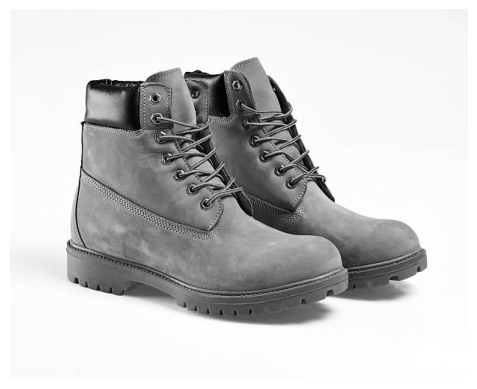

In [3]:
#convert image to grayscale

img_gray=cv.cvtColor(img, cv.COLOR_RGB2GRAY)

plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

In [4]:
#convert to negative image

def img_negative(img):
  return 255-img #subtracting 255 from grayscale image pixels will reverse its value

(-0.5, 611.5, 493.5, -0.5)

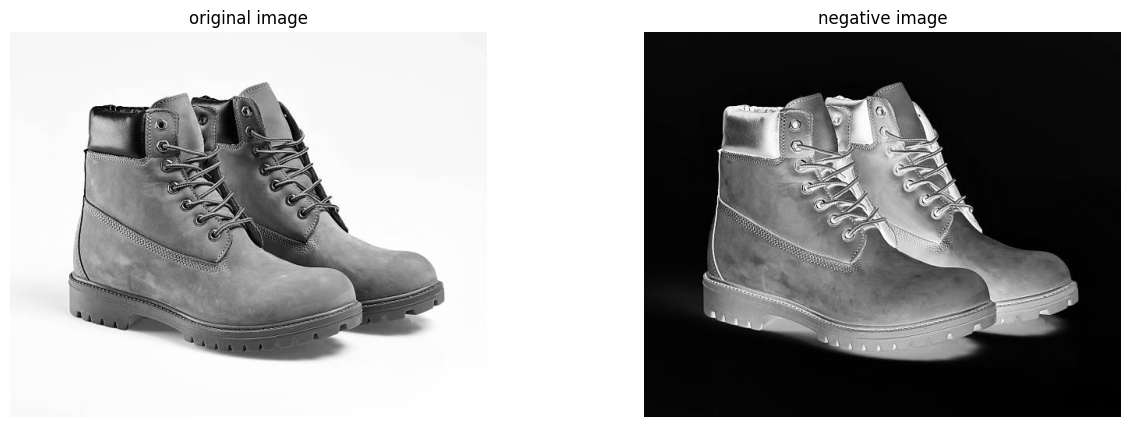

In [5]:
#plotting the images side by side

neg_img=img_negative(img_gray)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(img_gray, cmap='gray')
axs[0].set_title('original image')
axs[0].axis('off')

axs[1].imshow(neg_img, cmap='gray')
axs[1].set_title('negative image')
axs[1].axis('off')

**Conclusion**

---



- Applying the negative transformation effectively highlights the lighter regions in the original image by inverting the intensity values.

- This transformation can be useful for enhancing certain features in medical imaging or creating artistic effects in photography.

# TASK-2: Gamma transformation

**Objective:**

---


Apply gamma correction with different gamma values.

**Steps:**


---


1. Load a grayscale image.

2. Apply gamma correction with γ=0.5, γ=1.0, and γ=2.0

3. Display the original and the gamma-corrected images

In [6]:
#function to perform gamma correction

def gamma_correction(img, g_val):
  n = img/255.0 #normalize the image pixels bw 0 and 1, dividing by 255 for grayscale
  corr = np.power(n, g_val) #applying gamma correction
  corr = np.uint8(corr*255) #rescale the pixels (multiply by 255), and result converted to an unsigned 8-bit integer,std. format for image data
  return corr

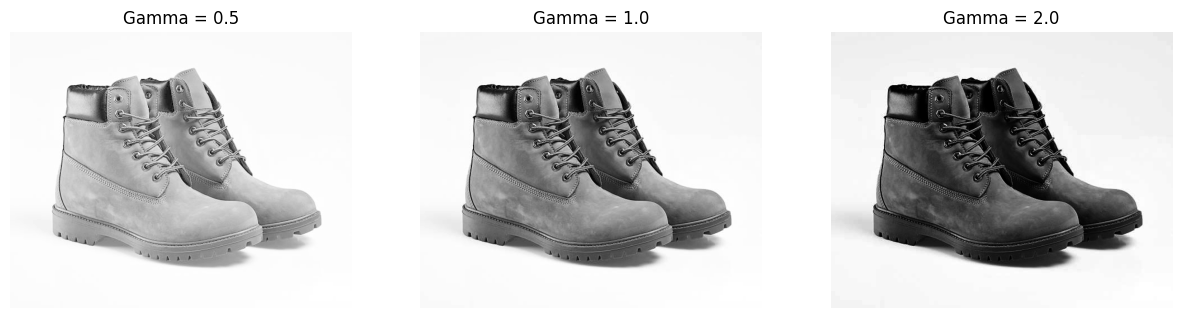

In [7]:
g_vals = [0.5, 1.0, 2.0] #sample gamma values, <1 means the image gets brighter, =1 means no change, >1, the image gets darker

plt.figure(figsize=(15, 5))

for i, g in enumerate(g_vals): #plotting 1 gamma-corrected image for each gamma value
    plt.subplot(1, 3, i + 1)
    plt.axis('off')
    plt.imshow(gamma_correction(img_gray, g), cmap='gray')
    plt.title(f'Gamma = {g}')

plt.show()


**Conclusion**

---



- Gamma correction allows for the adjustment of image brightness, where lower gamma values result in brighter images, and higher values lead to darker images.

- This technique is essential in display systems to match the non-linear response of monitors and enhance visual quality under different lighting conditions.

# TASK-3: Log transform

**Objective**



---


Apply log transformation to enhance an image.

**Steps:**

---



1. Load a grayscale image.

2. Apply log transformation.

3. Display the original and the log-transformed image.

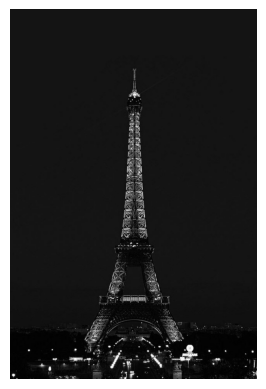

In [8]:
#plotting a darker image to showcase log transformation

img=cv.imread(r'/content/paris.jpg')
img_gray=cv.cvtColor(img, cv.COLOR_RGB2GRAY)

plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

In [9]:
#log transformation formula: s = c.log(1+r) (1 is added to avoid log(0))
#enhance details in darker parts of the images

def log_transform(img):
  flt = img.astype(np.float32) #convert image to float for calculation
  c = 255 / np.log(1+np.max(flt)) #the constant c is calculated to scale the logarithmically transformed values back to the range [0, 255], which is the std range for 8-bit images
  s = c * np.log(1+flt) #log formula calculated for each pixel
  s = np.array(s, dtype=np.uint8) #convert back to unsigned 8-bit image
  return s

(-0.5, 639.5, 959.5, -0.5)

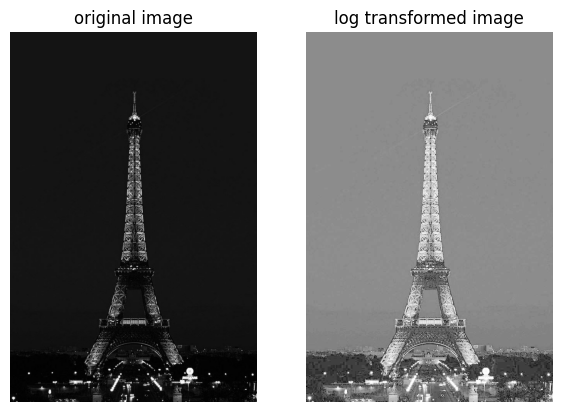

In [10]:
#plotting the images side by side

log_img=log_transform(img_gray)

fig, axs = plt.subplots(1, 2, figsize=(7, 5))

axs[0].imshow(img_gray, cmap='gray')
axs[0].set_title('original image')
axs[0].axis('off')

axs[1].imshow(log_img, cmap='gray')
axs[1].set_title('log transformed image')
axs[1].axis('off')

**Conclusion:**

---

- Log transformation effectively compresses the pixel value range, amplifying details in darker regions while diminishing the intensity of brighter areas.

- This technique is especially advantageous for enhancing images with extensive intensity variations, such as those found in satellite or medical imaging.

# TASK-4:  Comparing transformations

**Objective**:

---


Compare the effects of different transformations.

**Steps:**

---



1. Load a grayscale image.

2. Apply image negative, gamma correction (γ=2.0\gamma = 2.0γ=2.0), and log transformation.

3. Display the original image alongside the transformed images for comparison.

In [12]:
img=img=cv.imread("/content/boots.jpg")
img_gray=cv.cvtColor(img, cv.COLOR_RGB2GRAY)
neg_img=img_negative(img_gray)
gamma_img=gamma_correction(img_gray,2.0)
log_img=log_transform(img_gray)

(-0.5, 611.5, 493.5, -0.5)

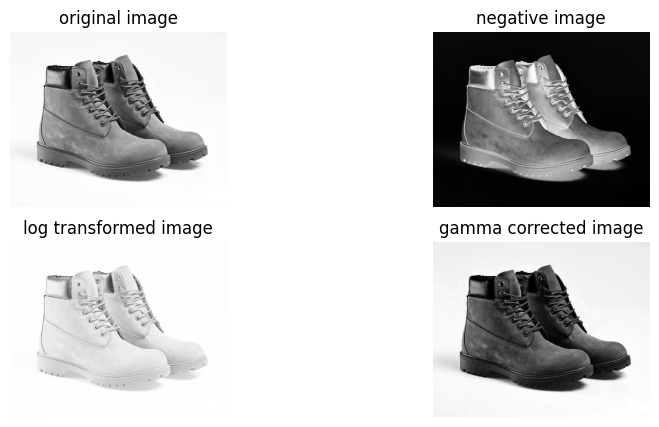

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

axs[0,0].imshow(img_gray, cmap='gray')
axs[0,0].set_title('original image')
axs[0,0].axis('off')

axs[0,1].imshow(neg_img, cmap='gray')
axs[0,1].set_title('negative image')
axs[0,1].axis('off')

axs[1,0].imshow(log_img, cmap='gray')
axs[1,0].set_title('log transformed image')
axs[1,0].axis('off')

axs[1,1].imshow(gamma_img, cmap='gray')
axs[1,1].set_title('gamma corrected image')
axs[1,1].axis('off')

**Conclusion**

---

- Analyzing various transformations demonstrates that each technique distinctly modifies the image: negative transformation inverts contrast, gamma correction adjusts brightness, and log transformation enhances low-intensity details.

- This evaluation aids in choosing the suitable transformation depending on the specific goals, such as enhancing details or adjusting contrast.

# TASK-5: Apply transformations to color images

**Objective:**

---


Apply the transformations to a color image by processing each channel separately.

**Steps:**

---



1. Load a color image.

2. Split the image into its R, G, and B channels.

3. Apply image negative, gamma correction, and log transformation to each channel.

4. Merge the channels back together.

5. Display the original and the transformed images.

In [14]:
# plotting a color image

img=cv.imread('/content/boots.jpg')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)

In [15]:
# splitting image into different channels

b,g,r=cv.split(img)

In [16]:
# applying transforms to red channel
neg_r=img_negative(r)
gamma_r=gamma_correction(r,2.0)
log_r=log_transform(r)

# applying transforms to blue channel
neg_b=img_negative(b)
gamma_b=gamma_correction(b,2.0)
log_b=log_transform(b)

# applying transforms to green channel
neg_g=img_negative(g)
gamma_g=gamma_correction(g,2.0)
log_g=log_transform(g)

In [17]:
# merging channels into the images

img_neg=cv.merge([neg_r,neg_g,neg_b])
img_gamma=cv.merge([gamma_r,gamma_g,gamma_b])
img_log=cv.merge([log_r,log_g,log_b])

(-0.5, 611.5, 493.5, -0.5)

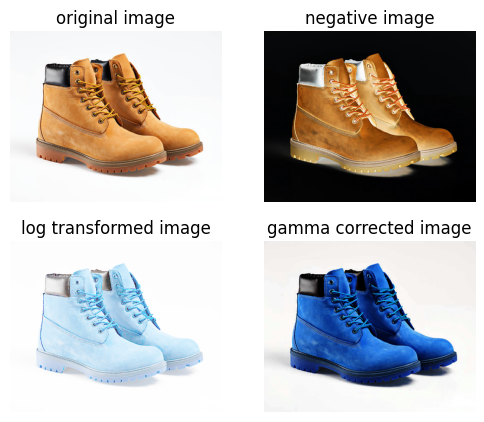

In [18]:
# plot the merged images

fig, axs = plt.subplots(2, 2, figsize=(6, 5))

axs[0,0].imshow(img)
axs[0,0].set_title('original image')
axs[0,0].axis('off')

axs[0,1].imshow(img_neg)
axs[0,1].set_title('negative image')
axs[0,1].axis('off')

axs[1,0].imshow(img_log)
axs[1,0].set_title('log transformed image')
axs[1,0].axis('off')

axs[1,1].imshow(img_gamma)
axs[1,1].set_title('gamma corrected image')
axs[1,1].axis('off')

**Conclusions**

---

- Applying transformations to individual color channels enables more precise control over color images, maintaining overall color balance while fine-tuning intensity.

- This method is advantageous for color correction, as it allows for the enhancement of specific image features without compromising its natural appearance.

